# Wrapper vs Filter Comparision

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### data

In [3]:
wrapper_results = pd.read_csv(r"C:\Users\Coord-Personal\Documents\ITZELT\data_sciece_girlypop\proyecto_salvador\datos\consolidated_output_MCC_fitness.csv")
filter_results = pd.read_csv(r"C:\Users\Coord-Personal\Documents\ITZELT\data_sciece_girlypop\proyecto_salvador\datos\filter_method_results_2.csv")

### preprocessing 

In [4]:
# add combination column to each dataset 
wrapper_results['combination'] = wrapper_results['optimizer'] + '_' + wrapper_results['classifier']
filter_results["combination"] = filter_results["filter_method"] + " _ " + filter_results["classifier"]

In [5]:
filter_results

,filter_method,classifier,accuracy,precision,recall,F1,MCC,Balanced_accuracy,total_time,features,combination
0,CHI,knn,0.949930,0.876789,0.862100,0.868981,0.907295,0.862100,0.540342,"['meanX', 'maxX', 'meanX2', 'sdX2', 'sdZ2', 's...",CHI _ knn
1,CHI,svm,0.949930,0.850205,0.807585,0.812694,0.907188,0.807585,0.964163,"['meanX', 'maxX', 'meanX2', 'sdX2', 'sdZ2', 's...",CHI _ svm
2,CHI,knn,0.949930,0.876789,0.862100,0.868981,0.907295,0.862100,0.216224,"['meanX', 'maxX', 'meanX2', 'sdX2', 'sdZ2', 's...",CHI _ knn
3,CHI,svm,0.949930,0.850205,0.807585,0.812694,0.907188,0.807585,1.829953,"['meanX', 'maxX', 'meanX2', 'sdX2', 'sdZ2', 's...",CHI _ svm
4,CHI,knn,0.949930,0.876789,0.862100,0.868981,0.907295,0.862100,0.661929,"['meanX', 'maxX', 'meanX2', 'sdX2', 'sdZ2', 's...",CHI _ knn
...,...,...,...,...,...,...,...,...,...,...,...
295,SPEARMAN,svm,0.943847,0.765754,0.783139,0.774126,0.896069,0.783139,1.230989,"['minX', 'minY', 'minZ', 'meanX2', 'minX2', 'm...",SPEARMAN _ svm
296,SPEARMAN,knn,0.941975,0.852790,0.832370,0.840803,0.892325,0.832370,0.371955,"['minX', 'minY', 'minZ', 'meanX2', 'minX2', 'm...",SPEARMAN _ knn
297,SPEARMAN,svm,0.943847,0.765754,0.783139,0.774126,0.896069,0.783139,1.166072,"['minX', 'minY', 'minZ', 'meanX2', 'minX2', 'm...",SPEARMAN _ svm
298,SPEARMAN,knn,0.941975,0.852790,0.832370,0.840803,0.892325,0.832370,0.267155,"['minX', 'minY', 'minZ', 'meanX2', 'minX2', 'm...",SPEARMAN _ knn


In [6]:
# calculate the average of each metric and feature by combination 
wrapper_avg = wrapper_results.groupby("combination")[["accuracy", "precision",'recall',"F1", "MCC", "Balanced_accuracy", "sensitivity", "specificity", "number_features"]].mean().reset_index()
filter_avg = filter_results.groupby("combination")[["accuracy", "precision", 'recall',"F1", "MCC", "Balanced_accuracy"]].mean().reset_index()

In [7]:
average_features = int(wrapper_avg["number_features"].mean())
print(f"The average number of features the optimizers chose was {average_features}")

The average number of features the optimizers chose was 6


In [8]:
# add column to identify the method
df_wrapper = wrapper_avg[["combination", "accuracy", "precision",'recall',"F1", "MCC", "Balanced_accuracy"]]
df_wrapper["method"] = "Wrapper"

df_filter = filter_avg[["combination","accuracy", "precision",'recall',"F1", "MCC", "Balanced_accuracy"]]
df_filter["method"] = "Filter"

# unite both dataframes
df_comparation = pd.concat([df_wrapper, df_filter])

C:\Users\Coord-Personal\AppData\Local\Temp\ipykernel_19724\3359641697.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wrapper["method"] = "Wrapper"


In [9]:
df_comparation

,combination,accuracy,precision,recall,F1,MCC,Balanced_accuracy,method
0,BaseDE_knn,0.955186,0.883927,0.861475,0.870955,0.917010,0.861475,Wrapper
1,BaseDE_svm,0.957682,0.882995,0.861311,0.870161,0.921689,0.861311,Wrapper
2,BaseGA_knn,0.953439,0.875563,0.861889,0.867892,0.913968,0.861889,Wrapper
3,BaseGA_svm,0.957245,0.882392,0.861304,0.870329,0.920903,0.861304,Wrapper
4,OriginalABC_knn,0.954188,0.878257,0.863191,0.869879,0.915268,0.863191,Wrapper
5,OriginalABC_svm,0.959803,0.889657,0.871001,0.879193,0.925703,0.871001,Wrapper
6,OriginalArchOA_knn,0.953767,0.877235,0.861821,0.868564,0.914509,0.861821,Wrapper
7,OriginalArchOA_svm,0.955686,0.877654,0.854041,0.863668,0.917941,0.854041,Wrapper
8,OriginalDO_knn,0.954328,0.878549,0.861033,0.868514,0.915511,0.861033,Wrapper
9,OriginalDO_svm,0.957620,0.882943,0.864226,0.872286,0.921624,0.864226,Wrapper


### scatter plot MCC

C:\Users\Coord-Personal\AppData\Local\Temp\ipykernel_19724\886976865.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_comparation["combination"], rotation=90, ha="right")
C:\Users\Coord-Personal\AppData\Local\Temp\ipykernel_19724\886976865.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_comparation["combination"], rotation=90, ha="right")
C:\Users\Coord-Personal\AppData\Local\Temp\ipykernel_19724\886976865.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_comparation["combination"], rotation=90, ha="right")
C:\Users\Coord-Personal\AppData\Local\Temp\ipykernel_19724\886976865.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. 

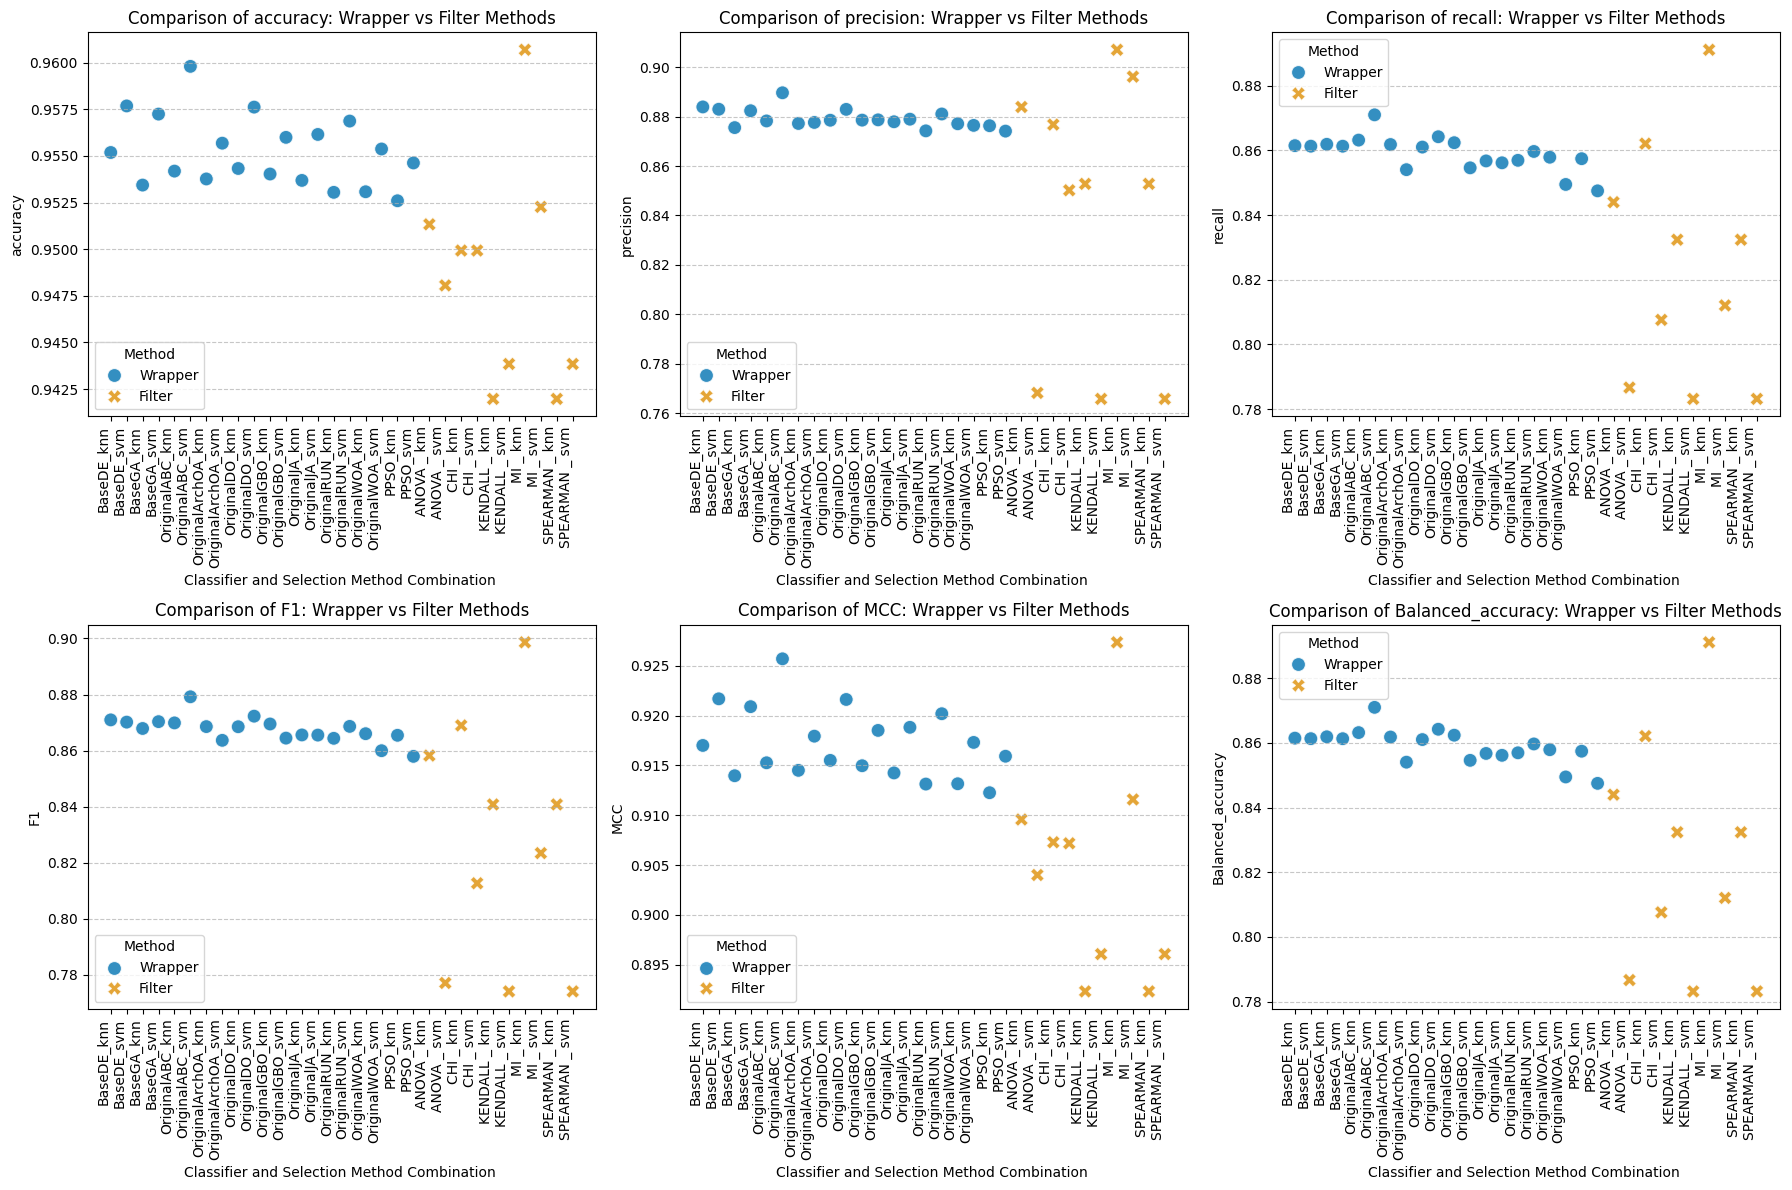

In [10]:
metrics = ["accuracy", "precision", "recall", "F1", "MCC", "Balanced_accuracy"]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for ax, i in zip(axes.flatten(), metrics):
    sns.scatterplot(data=df_comparation, x="combination", y=i, hue="method",
                    style="method", s=100, palette="colorblind", alpha=0.8, ax=ax)

    ax.set_xticklabels(df_comparation["combination"], rotation=90, ha="right")
    ax.set_title(f"Comparison of {i}: Wrapper vs Filter Methods")
    ax.set_xlabel("Classifier and Selection Method Combination ")
    ax.set_ylabel(i)
    ax.grid(axis="y", linestyle="--", alpha=0.7)
    ax.legend(title="Method")

plt.tight_layout()  
plt.savefig(r"C:\Users\Coord-Personal\Documents\ITZELT\data_sciece_girlypop\proyecto_salvador\imagenes\wrapper_vs_filter_comparison.svg")
plt.show()
